In [63]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [65]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [66]:
#Create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [67]:
#Reflect an existing database into a new model
Base = automap_base()
#Reflect the tables
Base.prepare(autoload_with=engine)

In [68]:
#View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [69]:
#Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [70]:
#Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [71]:
#Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()[0]
recent_date

'2017-08-23'

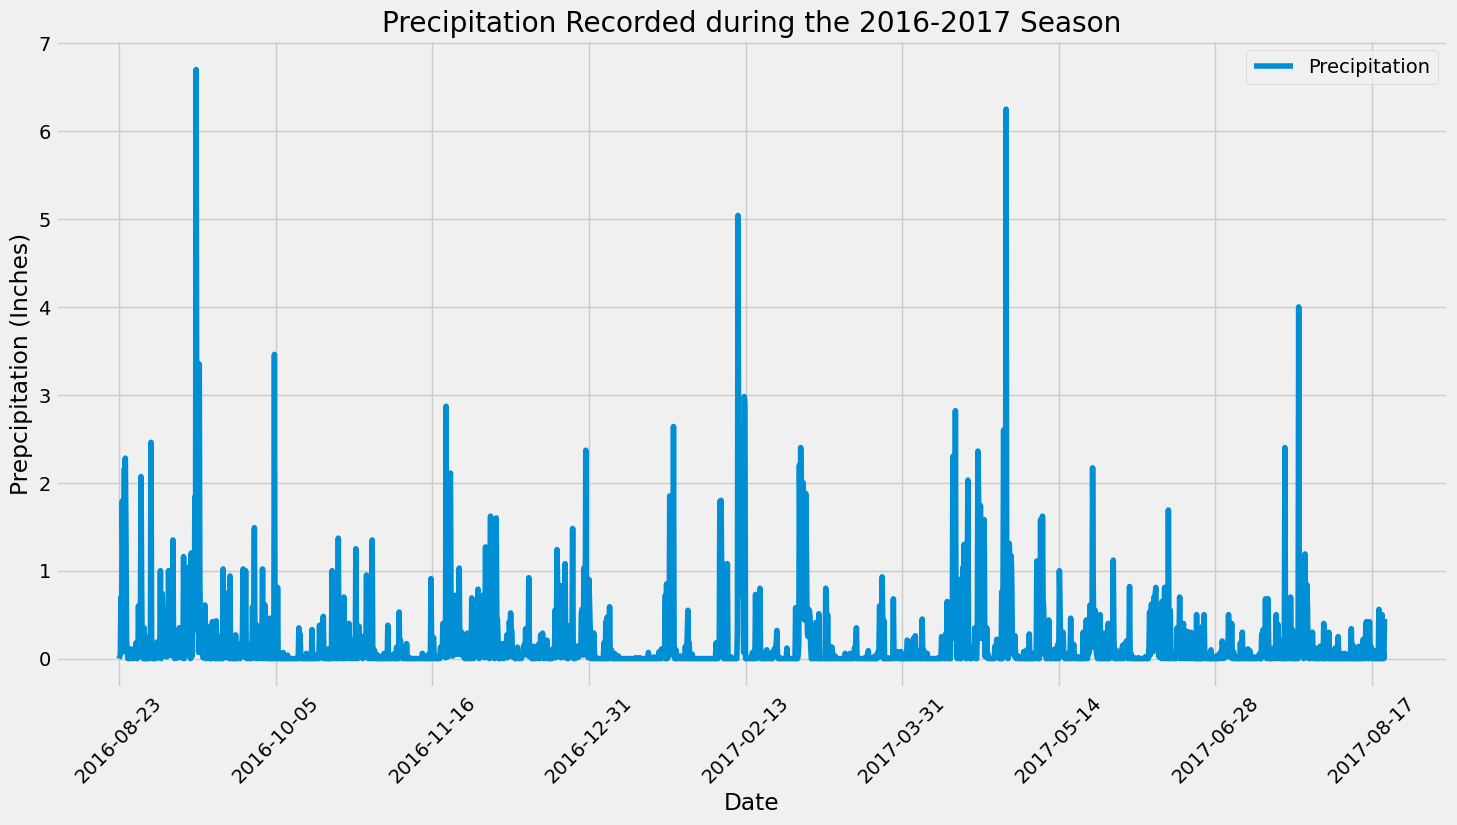

In [72]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the most recent data point in the database. 

#Calculate the date one year from the last date in data set.
preYear = dt.datetime.strptime(recent_date,'%Y-%m-%d').date() - dt.timedelta(365)

#Perform a query to retrieve the date and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= preYear).all()

#Save the query results as a Pandas DataFrame. Explicitly set the column names
date_precip_df = pd.DataFrame(query, columns=['Date','Precipitation']).dropna().set_index('Date')

#Sort the dataframe by date
date_precip_df.sort_index(inplace=True)

#Use Pandas Plotting with Matplotlib to plot the data
date_precip_df.plot(rot=45, title='Precipitation Recorded during the 2016-2017 Season', ylabel='Prepcipitation (Inches)', figsize=[16,8]);

In [73]:
#Use Pandas to calculate the summary statistics for the precipitation data
date_precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [74]:
session.query(station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [75]:
#Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).first()[0]

9

In [76]:
#Design a query to find the most active stations (i.e. which stations have the most rows?)
#List the stations and their counts in descending order.
session.query(measurement.station, func.count()).group_by(measurement.station).order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
#Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

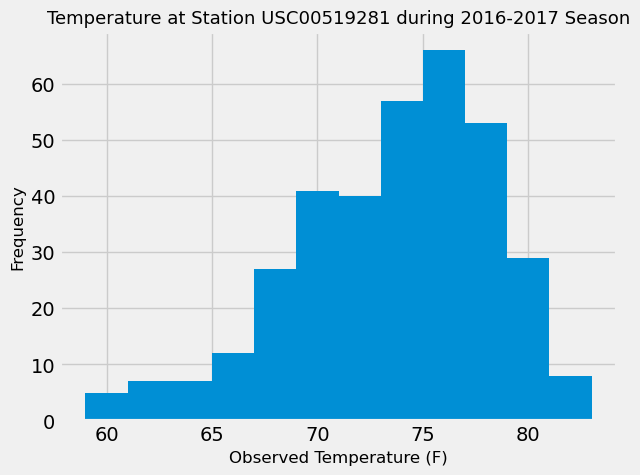

In [78]:
#Using the most active station id
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temp_df = pd.DataFrame(session.query(measurement.tobs).filter((measurement.date >= preYear) & 
                                       (measurement.station == 'USC00519281')).all())

fig, ax = plt.subplots()
bins=12

ax.hist(active_temp_df, bins=bins)
ax.set_title('Temperature at Station USC00519281 during 2016-2017 Season', fontsize=13)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Observed Temperature (F)', fontsize=12);

# Close Session

In [79]:
#Close Session
session.close()